In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.special import jv

In [2]:
year = 3.1536e7               #Seconds in a year
M_sun = 1.9891e30             #Mass of sun in kg
G = 6.6743e-11                #gravitational constant in m^3/kg/s^2
c = 299792458                 #speed in m/s
#D = 3.086e22                  #Distance in meters (1 Mpc)
#m1 = 0.5 * M_sun              #Mass of WD1 in kg
#m2 = 0.5 * M_sun              #Mass of WD2 in kg
#mu = (m1 * m2)/(m1 + m2)      #Reduced Mass of system in kg
#M = m1 + m2                   #Total mass of system in kg
mu = 1 * M_sun
M = (10**6) * M_sun
D = 6 * ((2*G*M)/(c**2))

e0 = 0.1                     #LSO eccentricity (unitless)
nu0 = 0.00205        #LSO orbital frequency (1/seconds)

e1 = 0.3
nu1 = 0.00165

e2 = 0.5
nu2 = 0.00115

In [3]:
#Define the differential equations governing evolution due to gravitational radiation
def dnudt(e0, nu0):
    dnudt = (96/(10*np.pi))*(((c**6)*mu)/((M**3)*(G**2)))*((2*np.pi*(G*M/(c**3)*nu0))**(11/3))*((1-(e0**2))**(-9/2))*((1+((73/24)*(e0**2))+((37/96)*(e0**4)))*(1-(e0**2)))
    return dnudt

def dedt(e0, nu0):
    dedt = -1*(e0/15)*(((c**3)*mu)/((M**2)*G))*((1-(e0**2))**(-7/2))*((2*np.pi*(G*M/(c**3)*nu0))**(8/3))*((304+(121*(e0**2)))*(1-(e0**2)))
    return dedt

In [4]:
dnudt0 = dnudt(e0, nu0)
dedt0 = dedt(e0, nu0)

dnudt1 = dnudt(e1, nu1)
dedt1 = dedt(e1, nu1)

dnudt2 = dnudt(e2, nu2)
dedt2 = dedt(e2, nu2)

t_M = (G * M)/(c**3)        #Characteristic length scale of M in seconds
t_char = nu0/dnudt0         #Characteristic timescale in seconds
t_char1 = nu1/dnudt1
t_char2 = nu2/dnudt2

A0 = t_M * nu0              #Reletavistic Quantity maybe (unitless)
A1 = t_M * nu1
A2 = t_M * nu2

t0 = 0                      #Start time (unitless)
tf = (-10 * year)/t_char      #End time (unitless)
tf1 = (-10 * year)/t_char1
tf2 = (-10 * year)/t_char2

In [5]:
initial_conditions = np.array([A0, e0])

def coupled_odes(t, y):
    A, e = y
    
    dAdt  = (96/(10*np.pi))*((t_char/t_M)*(mu/M))*((2*np.pi*A)**(11/3))*((1-(e**2))**(-9/2))*((1+((73/24)*(e**2))+((37/96)*(e**4)))*(1-(e**2)))
    
    dedt = -1*(e/15)*((t_char/t_M)*(mu/M))*((1-(e**2))**(-7/2))*((2*np.pi*A)**(8/3))*((304+(121*(e**2)))*(1-(e**2)))
    
    return [dAdt, dedt]

t_span = np.array([t0, tf])
times = np.linspace(t0,tf,1000)
solution = solve_ivp(coupled_odes, t_span, initial_conditions, t_eval=times)

t = solution.t
nu = solution.y[0]
e = solution.y[1]

In [6]:
initial_conditions1 = np.array([A1, e1])

def coupled_odes1(t, y):
    A1, e1 = y
    
    dAdt1  = (96/(10*np.pi))*((t_char1/t_M)*(mu/M))*((2*np.pi*A1)**(11/3))*((1-(e1**2))**(-9/2))*((1+((73/24)*(e1**2))+((37/96)*(e1**4)))*(1-(e1**2)))
    
    dedt1 = -1*(e1/15)*((t_char1/t_M)*(mu/M))*((1-(e1**2))**(-7/2))*((2*np.pi*A1)**(8/3))*((304+(121*(e1**2)))*(1-(e1**2)))
    
    return [dAdt1, dedt1]

t_span1 = np.array([t0, tf1])
times1 = np.linspace(t0,tf1,1000)
solution1 = solve_ivp(coupled_odes1, t_span1, initial_conditions1, t_eval=times1)

t1 = solution1.t
nu1 = solution1.y[0]
e1 = solution1.y[1]

In [7]:
initial_conditions2 = np.array([A2, e2])

def coupled_odes2(t, y):
    A2, e2 = y
    
    dAdt2  = (96/(10*np.pi))*((t_char2/t_M)*(mu/M))*((2*np.pi*A2)**(11/3))*((1-(e2**2))**(-9/2))*((1+((73/24)*(e2**2))+((37/96)*(e2**4)))*(1-(e2**2)))
    
    dedt2 = -1*(e2/15)*((t_char2/t_M)*(mu/M))*((1-(e2**2))**(-7/2))*((2*np.pi*A2)**(8/3))*((304+(121*(e2**2)))*(1-(e2**2)))
    
    return [dAdt2, dedt2]

t_span2 = np.array([t0, tf2])
times2 = np.linspace(t0,tf2,1000)
solution2 = solve_ivp(coupled_odes2, t_span2, initial_conditions2, t_eval=times2)

t2 = solution2.t
nu2 = solution2.y[0]
e2 = solution2.y[1]

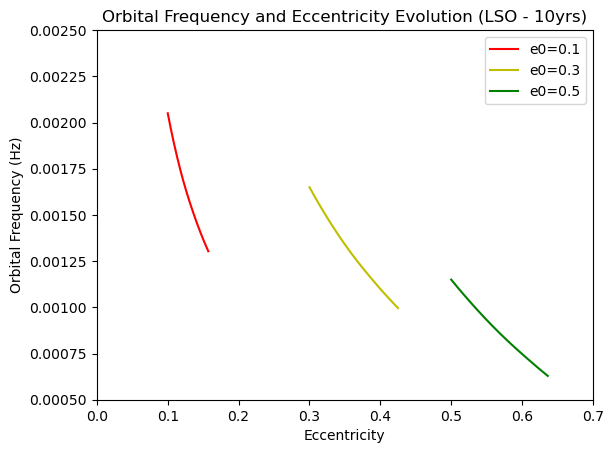

In [8]:
plt.plot(e, (nu/t_M), 'r-', label='e0=0.1')
plt.plot(e1, (nu1/t_M), 'y-', label='e0=0.3')
plt.plot(e2, (nu2/t_M), 'g-', label='e0=0.5')
plt.title('Orbital Frequency and Eccentricity Evolution (LSO - 10yrs)')
plt.xlabel('Eccentricity')
plt.ylabel('Orbital Frequency (Hz)')
plt.legend()
plt.xlim(0, 0.7)
plt.ylim(0.5e-3, 2.5e-3)
plt.show()